In [1]:
!pip install pandas
!pip install sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import os

In [3]:
work_dir = r'E:\FoB\FoB2021Project_3h'
blosum_path = os.path.join(work_dir, 'data', 'BLOSUM62.txt')
vep_path = os.path.join(work_dir, 'data', 'vep', 'HGVS_2020_big_VEP_baseline.tsv')

In [4]:
blosum = pd.read_csv(blosum_path, sep='\ +', comment='#', index_col=0)
blosum.head()

C:\ProgramData\Anaconda3\envs\FoB2021Project_3h\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
x,,,,,,,,,,,,,,,,,,,,
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0
R,-1,5,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3
N,-2,0,6,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3
D,-2,-2,1,6,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1


In [5]:
vep = pd.read_csv(vep_path,sep='\t')
vep.head()

,# ID,Amino_acids,Codons
0,NC_000005.10:g.43702652T>G,N/K,aaT/aaG
1,NC_000008.11:g.24394146T>C,M/T,aTg/aCg
2,NC_000014.9:g.35007370A>G,T/A,Aca/Gca
3,NC_000023.11:g.48523912G>T,W/C,tgG/tgT
4,NC_000007.14:g.92086295A>G,Q/R,cAa/cGa


In [6]:
vep['ref_aa'] = vep['Amino_acids'].str.split('/').map(lambda x: x[0])
vep['mut_aa'] = vep['Amino_acids'].str.split('/').map(lambda x: x[1])
vep=vep[['# ID','ref_aa','mut_aa']]
vep.head()

,# ID,ref_aa,mut_aa
0,NC_000005.10:g.43702652T>G,N,K
1,NC_000008.11:g.24394146T>C,M,T
2,NC_000014.9:g.35007370A>G,T,A
3,NC_000023.11:g.48523912G>T,W,C
4,NC_000007.14:g.92086295A>G,Q,R


In [7]:
baseline = vep.copy()
baseline['Score'] = vep.apply(lambda row: blosum.loc[row['ref_aa'],row['mut_aa']],axis=1)
baseline.head()

,# ID,ref_aa,mut_aa,Score
0,NC_000005.10:g.43702652T>G,N,K,0
1,NC_000008.11:g.24394146T>C,M,T,-1
2,NC_000014.9:g.35007370A>G,T,A,0
3,NC_000023.11:g.48523912G>T,W,C,-2
4,NC_000007.14:g.92086295A>G,Q,R,1


In [8]:
baseline_path = os.path.join(work_dir, 'output', 'HGVS_2020_big_baseline_scores.tsv')
baseline[['# ID','Score']].to_csv(baseline_path,sep='\t',index=None)


In [9]:
polyphen_path = os.path.join(work_dir, 'data', 'vep', 'HGVS_2020_big_polyphen_scores.tsv')
sift_path = os.path.join(work_dir, 'data', 'vep', 'HGVS_2020_big_sift_scores.tsv')
benchmark_path = os.path.join(work_dir, 'data', 'HGVS_2020_big_benchmark.tsv')

polyphen = pd.read_csv(polyphen_path,sep='\t')
sift = pd.read_csv(sift_path,sep='\t')
benchmark_big = pd.read_csv(benchmark_path,sep='\t')
benchmark_small = benchmark_big.set_index('# ID').loc[sift['# ID']].reset_index()
polyphen.head(),sift.head(),benchmark_big.head(),benchmark_small.head()

(                         # ID  Score
 0  NC_000005.10:g.43702652T>G  0.992
 1  NC_000008.11:g.24394146T>C  0.003
 2   NC_000014.9:g.35007370A>G  0.997
 3  NC_000023.11:g.48523912G>T  0.995
 4  NC_000007.14:g.92086295A>G  0.944,
                          # ID  Score
 0  NC_000005.10:g.43702652T>G   0.00
 1  NC_000008.11:g.24394146T>C   0.19
 2   NC_000014.9:g.35007370A>G   0.00
 3  NC_000023.11:g.48523912G>T   0.00
 4  NC_000007.14:g.92086295A>G   0.16,
                           # ID       Label
 0   NC_000016.10:g.89748658C>T  Pathogenic
 1  NC_000008.11:g.143818378G>A  Pathogenic
 2   NC_000023.11:g.32644238T>A      Benign
 3   NC_000002.12:g.39022779A>G  Pathogenic
 4  NC_000001.11:g.154926384G>A  Pathogenic,
                          # ID       Label
 0  NC_000005.10:g.43702652T>G  Pathogenic
 1  NC_000008.11:g.24394146T>C      Benign
 2   NC_000014.9:g.35007370A>G  Pathogenic
 3  NC_000023.11:g.48523912G>T  Pathogenic
 4  NC_000007.14:g.92086295A>G      Benign)

In [10]:
fpr_baseline, tpr_baseline, threshold_baseline = \
    metrics.roc_curve(benchmark_small['Label'],baseline['Score'], pos_label ='Benign')
fpr_polyphen, tpr_polyphen, threshold_polyphen = \
    metrics.roc_curve(benchmark_small['Label'],1-polyphen['Score'],pos_label ='Benign')
fpr_sift, tpr_sift, threshold_sift = \
    metrics.roc_curve(benchmark_small['Label'],sift['Score'],pos_label ='Benign')

fpr_baseline, tpr_baseline, threshold_baseline

(array([0.        , 0.00333333, 0.03833333, 0.19333333, 0.32833333,
        0.51666667, 0.77      , 1.        ]),
 array([0.        , 0.05833333, 0.135     , 0.39      , 0.61666667,
        0.79      , 0.89666667, 1.        ]),
 array([ 4,  3,  2,  1,  0, -1, -2, -3], dtype=int64))

In [11]:
roc_auc_baseline = metrics.auc(fpr_baseline, tpr_baseline)
roc_auc_polyphen = metrics.auc(fpr_polyphen, tpr_polyphen)
roc_auc_sift = metrics.auc(fpr_sift, tpr_sift)

roc_auc_baseline, roc_auc_polyphen, roc_auc_sift

(0.6763402777777777, 0.8857999999999999, 0.8601041666666667)

In [12]:
baseline_auc_tsv_path = os.path.join(work_dir, 'output', 'ROCplot_HGVS_2020_big_baseline_xy.tsv')
polyphen_auc_tsv_path = os.path.join(work_dir, 'output', 'ROCplot_HGVS_2020_big_polyphen_xy.tsv')
sift_auc_tsv_path = os.path.join(work_dir, 'output', 'ROCplot_HGVS_2020_big_sift_xy.tsv')

In [13]:
pd.DataFrame(fpr_baseline,tpr_baseline).to_csv(baseline_auc_tsv_path, sep='\t',header=None)
pd.DataFrame(fpr_polyphen,tpr_polyphen).to_csv(polyphen_auc_tsv_path, sep='\t',header=None)
pd.DataFrame(fpr_sift,tpr_sift).to_csv(sift_auc_tsv_path, sep='\t',header=None)

C:\Users\radia\AppData\Local\Temp/ipykernel_17028/613003948.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


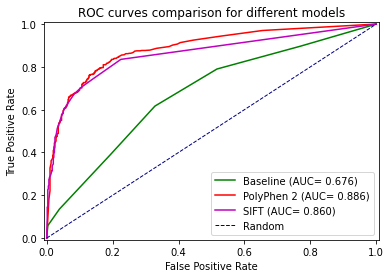

In [14]:
final_fig_path = os.path.join(work_dir, 'output', 'ROCplot_comparison.png')

fig, axes = plt.subplots(1, 1)
axes.plot(fpr_baseline, tpr_baseline, c='g', label='Baseline (AUC= {:.3f})'.format(roc_auc_baseline))
axes.plot(fpr_polyphen, tpr_polyphen, c='r', label='PolyPhen 2 (AUC= {:.3f})'.format(roc_auc_polyphen))
axes.plot(fpr_sift, tpr_sift, c='m', label='SIFT (AUC= {:.3f})'.format(roc_auc_sift))
axes.plot((0, 1), (0, 1), color='navy', lw=1, linestyle='--', label='Random')
axes.set_xlim([-0.008, 1.008])
axes.set_ylim([-0.008, 1.008])
axes.legend()
axes.set_title('ROC curves comparison for different models')
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
plt.savefig(final_fig_path)
fig.show()